# Assignment 3: Reinforcement Learning Pipeline in Practice


*CS260R 2023Fall: Reinforcement Learning. Department of Computer Science at University of California, Los Angeles.
Course Instructor: Professor Bolei ZHOU. Assignment author: Zhenghao PENG.*

-----


## Demo 1: Setup dependencies

In [1]:
!pip install torch

# Install MetaDrive, a lightweight driving simulator
!pip install git+https://github.com/metadriverse/metadrive

# Test whether MetaDrive is properly installed. No error means the test is passed.
!python -m metadrive.examples.profile_metadrive --num-steps 100

!pip install pandas scipy seaborn tabulate pyyaml

# Update(2022-11-03): Fix pyglet compatability issue since it is updated to 2.0.0 recently.
!pip install "pyglet<2.0.0"

  Cloning https://github.com/metadriverse/metadrive to /private/var/folders/d6/58xph52d7z949h72qlscr1yh0000gn/T/pip-req-build-a96b7_46
  Running command git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive /private/var/folders/d6/58xph52d7z949h72qlscr1yh0000gn/T/pip-req-build-a96b7_46
  fatal: unable to access 'https://github.com/metadriverse/metadrive/': Could not resolve host: github.com
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive /private/var/folders/d6/58xph52d7z949h72qlscr1yh0000gn/T/pip-req-build-a96b7_46 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive /private/var/folders/d6/58xph52d7z949h72qlscr1yh0000gn/T/pip-req-build-a96b7_46 did not run succ

In [26]:
import os
try:
    
    from google.colab import drive
    drive.mount('/content/gdrive')

    DRIVE_PATH = '/content/gdrive/My\ Drive/cs269'
    DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
    if not os.path.exists(DRIVE_PYTHON_PATH):
      %mkdir $DRIVE_PATH

    ## the space in `My Drive` causes some issues,
    ## make a symlink to avoid this
    SYM_PATH = '/content/cs269'
    if not os.path.exists(SYM_PATH):
      !ln -s $DRIVE_PATH $SYM_PATH
    
    running_in_colab = True
    
    # We already mounted in our google drive.
    # Enter the foler where you put files in:
    %cd '/content/cs269'

    # Current working directory:
    !pwd

    # What files are there:
    !ls
   
    
except ModuleNotFoundError:
    running_in_colab = False
    print(
        "I guess you are running locally. If you get this message in Colab, check the files."
    )


I guess you are running locally. If you get this message in Colab, check the files.


## Demo 2: Train a TD3 agent

Spinning Up tutorial provides great explaination on TD3 algorithm:
https://spinningup.openai.com/en/latest/algorithms/td3.html

Please implement all TODOs in `core/td3_trainer.py` and `train_td3.py`.

### Demo 2.1: Train TD3 agent in Pendulum-v1

In [8]:
!python train_td3.py \
--env-id Pendulum-v1 \
--log-dir Pendulum-v1 \
--max-steps 50000 \
--start-steps 1000 \
--lr 1e-3

/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
Training Step:   2%|▍                    | 1004/50000 [00:00<00:04, 9968.73it/s]===== TD3 Training Step 1199 =====:
  actor_loss: 8.853894233703613
  critic_loss: 0.7258996963500977
  episode_reward: -1257.2570265048928
  frame_per_second: 1589
  log_dir: Pendulum-v1
  target_q: -9.030271530151367
  total_episodes: 6
  total_steps: 1199
  total_time: 0.7543210983276367

Trainer is saved at <Pendulum-v1/td3>. Progress is saved at <Pendulum-v1/td3/progress.csv>.
Training Step:   4%|▉                     | 2001/50000 [00:03<01:33, 514.71it/s]===== TD3 Training Step 2199 =====:
  actor_loss: 23.42719841003418
  critic_loss: 2.784943103790283
  episode_reward: -1386.4260442494124
  frame_per_second: 549
  log_dir: Pendulum-v1
  target_q: -23.769895553588867
  total_episodes: 11
  total_steps: 2199
  total_time: 4.001615047454834

Training Step:   6%|█▍                    | 3

Training Step:  38%|████████             | 19184/50000 [01:02<01:40, 307.43it/s]===== TD3 Training Step 19199 =====:
  actor_loss: 65.22380065917969
  critic_loss: 9.274314880371094
  episode_reward: -546.4252917974139
  frame_per_second: 307
  log_dir: Pendulum-v1
  target_q: -66.50798034667969
  total_episodes: 96
  total_steps: 19199
  total_time: 62.33847904205322

Training Step:  40%|████████▍            | 20184/50000 [01:05<01:37, 305.26it/s]===== TD3 Training Step 20199 =====:
  actor_loss: 75.35173034667969
  critic_loss: 13.65815544128418
  episode_reward: -524.8137789534585
  frame_per_second: 307
  log_dir: Pendulum-v1
  target_q: -77.06552124023438
  total_episodes: 101
  total_steps: 20199
  total_time: 65.60505795478821

Training Step:  42%|████████▉            | 21182/50000 [01:08<01:33, 307.87it/s]===== TD3 Training Step 21199 =====:
  actor_loss: 60.2100830078125
  critic_loss: 8.256917953491211
  episode_reward: -467.4931074549575
  frame_per_second: 307
  log_dir: Pe

Training Step:  74%|███████████████▌     | 37182/50000 [02:01<00:41, 308.32it/s]===== TD3 Training Step 37199 =====:
  actor_loss: 42.79613494873047
  critic_loss: 7.397920608520508
  episode_reward: -154.92248262026953
  frame_per_second: 306
  log_dir: Pendulum-v1
  target_q: -43.72902297973633
  total_episodes: 186
  total_steps: 37199
  total_time: 121.40811705589294

Training Step:  76%|████████████████     | 38183/50000 [02:04<00:39, 302.64it/s]===== TD3 Training Step 38199 =====:
  actor_loss: 45.122215270996094
  critic_loss: 8.761938095092773
  episode_reward: -152.43982376086373
  frame_per_second: 306
  log_dir: Pendulum-v1
  target_q: -46.44007873535156
  total_episodes: 191
  total_steps: 38199
  total_time: 124.67509007453918

Training Step:  78%|████████████████▍    | 39185/50000 [02:07<00:35, 303.87it/s]===== TD3 Training Step 39199 =====:
  actor_loss: 45.33180618286133
  critic_loss: 5.775240898132324
  episode_reward: -153.68366211095884
  frame_per_second: 306
  log

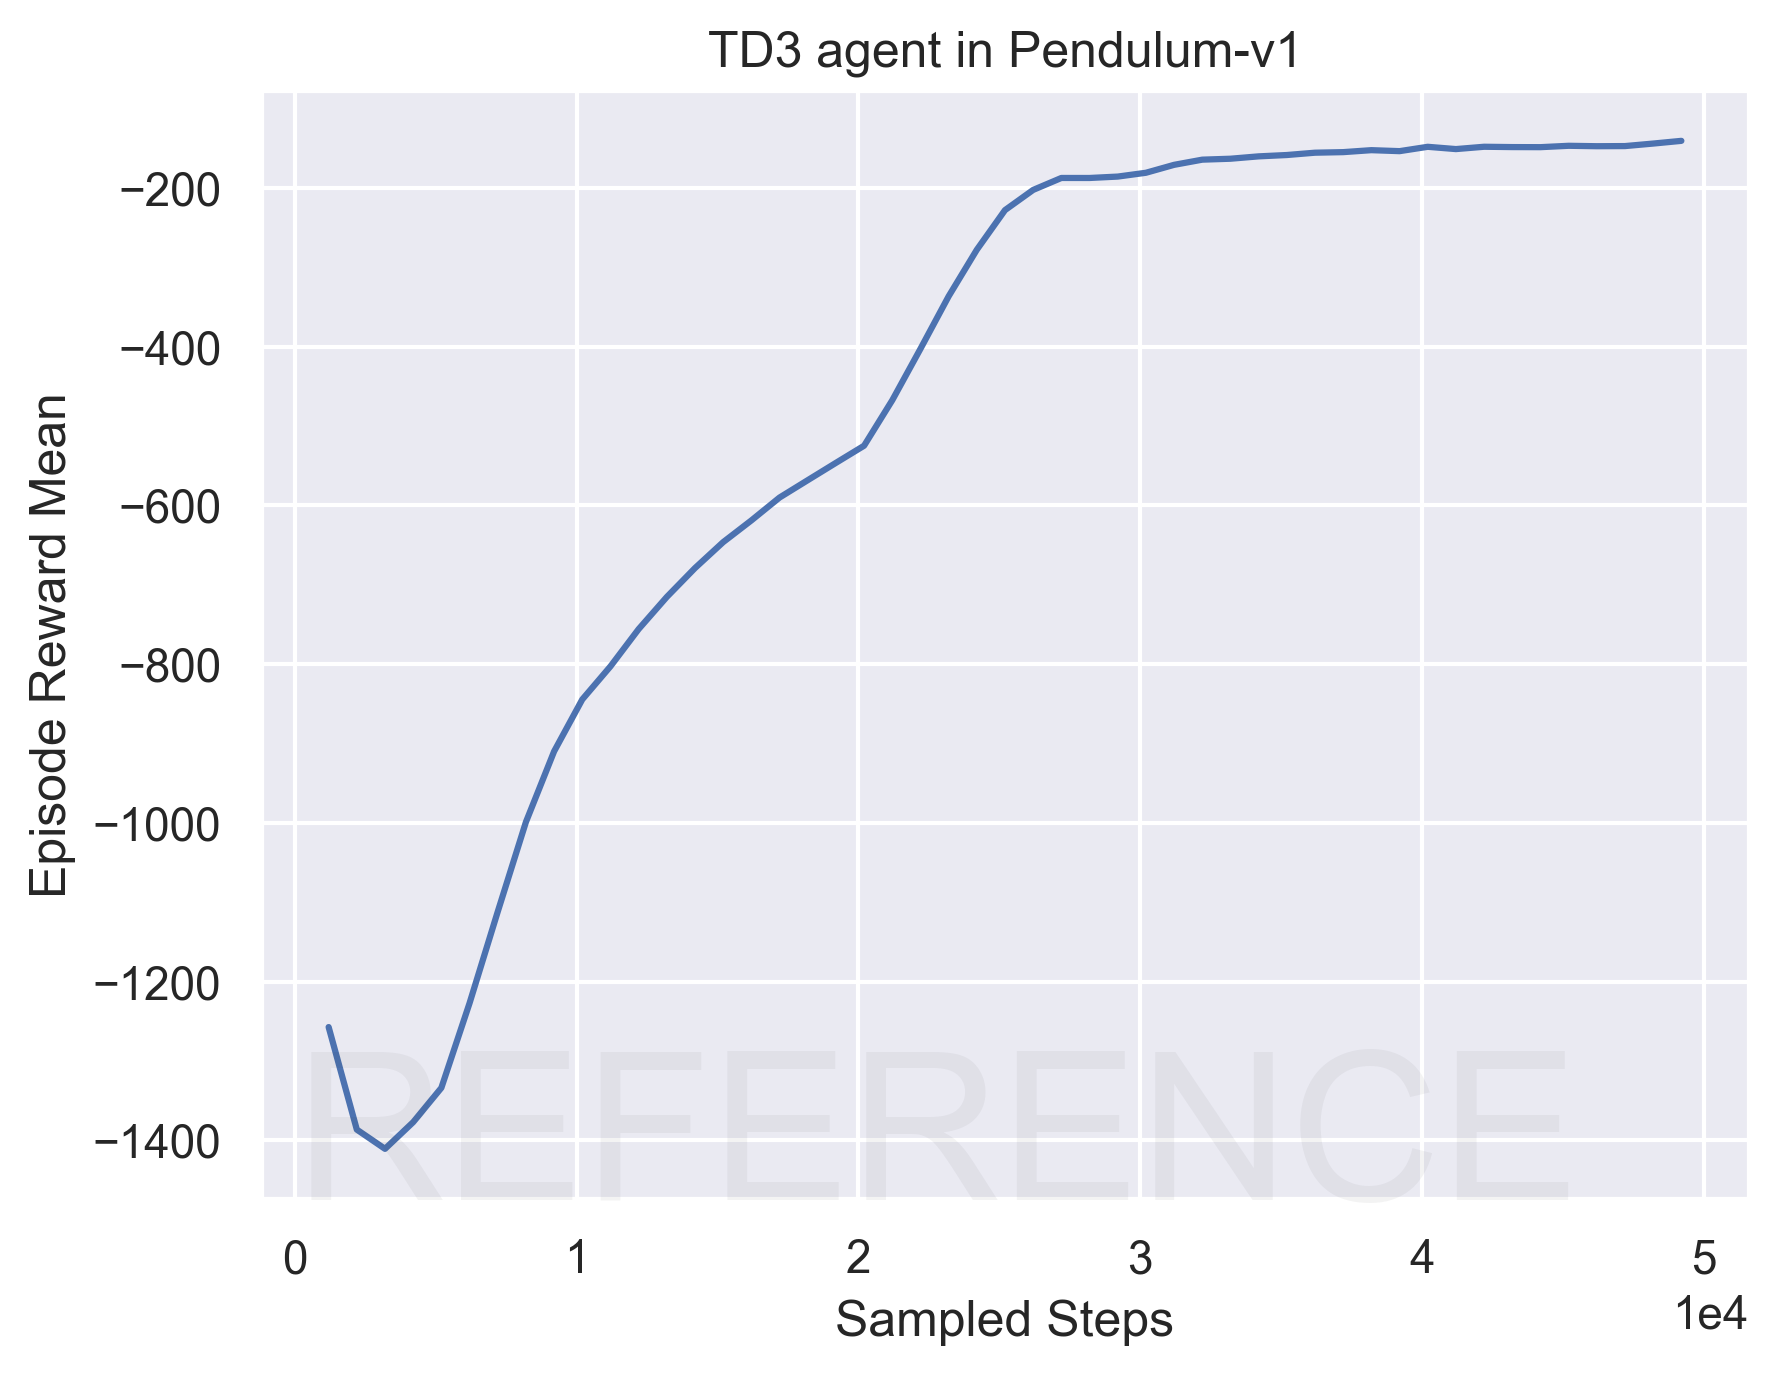

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v1/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in Pendulum-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# TODO: You should remove this line in your code.
ax.annotate("REFERENCE", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.2: Train TD3 agent in MetaDrive-Tut-Hard-v0

I notice that TD3 fails to train in MetaDrive-Tut-Easy-v0 environment while it can success fully train in Hard environment. So you only need to report the result in MetaDrive-Tut-Hard.

In [70]:
!python train_td3.py \
--env-id MetaDrive-Tut-Hard-v0 \
--log-dir MetaDrive-Tut-Hard-v0 \
--max-steps 100_000


/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
[INFO] MetaDrive version: 0.4.1.2
[INFO] Sensors: [lidar: Lidar(50,), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[WARNING] environment_num is deprecated. Use num_scenarios instead! (metadrive_env.py:119)
/Users/pengzhenghao/opt/anaconda3/envs/cs260r/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:210: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(
[INFO] Assets version: 0.

[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
Training Step:  10%|██                  | 10321/100000 [00:12<08:25, 177.45it/s][INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
Training Step:  10%|██                  | 10357/100000 [00:12<08:47, 170.03it/s][INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
Training Step:  10%|██                  | 10412/100000 [00:12<10:34, 141.25it/s][INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
Training Step:  10%|██                  | 10483/100000 [00:13<10:21, 144.01it/s][INFO] Episode ended! Scenario Index: 10

Training Step:  15%|███                 | 15005/100000 [00:41<09:03, 156.53it/s][INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.

 ===== TD3 Training Step 15011 =====:
  actor_loss: -0.17027094960212708
  critic_loss: 0.03528831899166107
  current_q1: 0.13312523066997528
  current_q2: 0.12687161564826965
  episode_reward: 1.4351254918684389
  frame_per_second: 357
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.04640727490186691
  success_rate: 0.0
  target_q: 0.16278915107250214
  total_episodes: 92
  total_steps: 15011
  total_time: 42.021238803863525

Training Step:  16%|███▏                | 16000/100000 [00:48<09:06, 153.79it/s][INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.

 ===== TD3 Training Step 16001 =====:
  actor_loss: -0.3056334853172302
  critic_loss: 0.15810921788215637
  current_q1: 0.26656875014305115
  current_q2: 0.25802043080329895
  episode_reward: 1.5056499563756123
  frame_per_second: 329
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.0

Training Step:  17%|███▍                | 17035/100000 [00:54<08:39, 159.61it/s][INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.

 ===== TD3 Training Step 17043 =====:
  actor_loss: -0.41304728388786316
  critic_loss: 0.44313502311706543
  current_q1: 0.36416229605674744
  current_q2: 0.3662397861480713
  episode_reward: 3.87038276314528
  frame_per_second: 309
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.020312342792749405
  success_rate: 0.0
  target_q: 0.36361464858055115
  total_episodes: 138
  total_steps: 17043
  total_time: 55.01045298576355

Training Step:  18%|███▌                | 18050/100000 [01:01<08:15, 165.43it/s][INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.

 ===== TD3 Training Step 18052 =====:
  actor_loss: .nan
  critic_loss: 0.2611325979232788
  current_q1: 0.5500707626342773
  current_q2: 0.5527640581130981
  episode_reward: 6.846192659647602
  frame_per_second: 294
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.03312557935714722
  su

Training Step:  21%|████                | 20617/100000 [01:17<06:46, 195.15it/s][INFO] Episode ended! Scenario Index: 1004 Reason: arrive_dest.

 ===== TD3 Training Step 20630 =====:
  actor_loss: .nan
  critic_loss: 0.49321985244750977
  current_q1: 1.4228206872940063
  current_q2: 1.4026453495025635
  episode_reward: 18.854246987247176
  frame_per_second: 266
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.09022471308708191
  success_rate: 0.02
  target_q: 1.4464597702026367
  total_episodes: 162
  total_steps: 20630
  total_time: 77.27293586730957

Training Step:  21%|████▏               | 21119/100000 [01:20<06:53, 190.67it/s][INFO] Episode ended! Scenario Index: 1014 Reason: arrive_dest.

 ===== TD3 Training Step 21122 =====:
  actor_loss: .nan
  critic_loss: 1.1110963821411133
  current_q1: 1.571510910987854
  current_q2: 1.5264246463775635
  episode_reward: 21.40443195623886
  frame_per_second: 263
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.07339144498109818
  success_rate: 0.03


Training Step:  30%|██████              | 30434/100000 [02:17<05:42, 203.16it/s][INFO] Episode ended! Scenario Index: 1006 Reason: arrive_dest.

 ===== TD3 Training Step 30439 =====:
  actor_loss: -8.843118667602539
  critic_loss: 0.323580265045166
  current_q1: 8.755410194396973
  current_q2: 8.824010848999023
  episode_reward: 77.16254655827537
  frame_per_second: 221
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.28123050928115845
  success_rate: 0.14
  target_q: 8.721158981323242
  total_episodes: 181
  total_steps: 30439
  total_time: 137.30533981323242

Training Step:  31%|██████▎             | 31428/100000 [02:23<06:22, 179.13it/s][INFO] Episode ended! Scenario Index: 1012 Reason: arrive_dest.

 ===== TD3 Training Step 31447 =====:
  actor_loss: -10.363377571105957
  critic_loss: 0.3887065649032593
  current_q1: 9.985827445983887
  current_q2: 10.016023635864258
  episode_reward: 84.78946566863254
  frame_per_second: 218
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.313176542520523

Training Step:  45%|█████████           | 45108/100000 [03:48<05:46, 158.33it/s][INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.

 ===== TD3 Training Step 45120 =====:
  actor_loss: .nan
  critic_loss: 1.390204906463623
  current_q1: 23.08134651184082
  current_q2: 22.941164016723633
  episode_reward: 193.74359710889541
  frame_per_second: 197
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.43330147862434387
  success_rate: 0.24
  target_q: 22.903854370117188
  total_episodes: 245
  total_steps: 45120
  total_time: 228.4393789768219

Training Step:  46%|█████████▏          | 46087/100000 [03:54<05:40, 158.55it/s][INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.

 ===== TD3 Training Step 46091 =====:
  actor_loss: -24.384475708007812
  critic_loss: 1.4817272424697876
  current_q1: 23.632076263427734
  current_q2: 23.598691940307617
  episode_reward: 200.98245760166265
  frame_per_second: 196
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.4683387279510498
  succes


 ===== TD3 Training Step 51149 =====:
  actor_loss: -28.289491653442383
  critic_loss: 1.8302364349365234
  current_q1: 28.011306762695312
  current_q2: 28.10753631591797
  episode_reward: 202.00686267185938
  frame_per_second: 192
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.49442994594573975
  success_rate: 0.22
  target_q: 28.073911666870117
  total_episodes: 272
  total_steps: 51149
  total_time: 266.3075828552246

Training Step:  52%|██████████▍         | 52255/100000 [04:33<04:18, 184.71it/s][INFO] Episode ended! Scenario Index: 1004 Reason: arrive_dest.

 ===== TD3 Training Step 52256 =====:
  actor_loss: .nan
  critic_loss: 1.6595735549926758
  current_q1: 29.524702072143555
  current_q2: 29.945079803466797
  episode_reward: 203.56800660031283
  frame_per_second: 190
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5078009366989136
  success_rate: 0.22
  target_q: 29.62511444091797
  total_episodes: 274
  total_steps: 52256
  total_time: 273.76898169517517

Training Step:  53%|███

Training Step:  60%|████████████        | 60433/100000 [05:23<03:33, 185.19it/s][INFO] Episode ended! Scenario Index: 1009 Reason: arrive_dest.

 ===== TD3 Training Step 60434 =====:
  actor_loss: .nan
  critic_loss: 3.115405559539795
  current_q1: 35.90736770629883
  current_q2: 36.03977966308594
  episode_reward: 199.83730328504953
  frame_per_second: 186
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5547167062759399
  success_rate: 0.26
  target_q: 36.113250732421875
  total_episodes: 297
  total_steps: 60434
  total_time: 323.9831519126892

Training Step:  62%|████████████▎       | 61833/100000 [05:31<03:16, 194.63it/s][INFO] Episode ended! Scenario Index: 1011 Reason: max step 

 ===== TD3 Training Step 61841 =====:
  actor_loss: -35.70383071899414
  critic_loss: 6.264774322509766
  current_q1: 35.07404708862305
  current_q2: 34.60524368286133
  episode_reward: 202.1852764132095
  frame_per_second: 186
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.47903212904930115
  success_rate: 0

Training Step:  69%|█████████████▊      | 69180/100000 [06:18<03:13, 159.67it/s][INFO] Episode ended! Scenario Index: 1003 Reason: arrive_dest.

 ===== TD3 Training Step 69196 =====:
  actor_loss: .nan
  critic_loss: 15.901710510253906
  current_q1: 39.373321533203125
  current_q2: 39.692142486572266
  episode_reward: 222.6663142464491
  frame_per_second: 182
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5884580612182617
  success_rate: 0.38
  target_q: 39.113224029541016
  total_episodes: 320
  total_steps: 69196
  total_time: 378.97156977653503

Training Step:  70%|██████████████      | 70412/100000 [06:26<02:50, 173.05it/s][INFO] Episode ended! Scenario Index: 1004 Reason: arrive_dest.

 ===== TD3 Training Step 70427 =====:
  actor_loss: -39.45061111450195
  critic_loss: 29.160049438476562
  current_q1: 39.29062271118164
  current_q2: 39.29475021362305
  episode_reward: 230.84693396688462
  frame_per_second: 182
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6070735454559326
  success_

Training Step:  78%|███████████████▌    | 78024/100000 [07:15<02:21, 154.80it/s][INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.

 ===== TD3 Training Step 78032 =====:
  actor_loss: .nan
  critic_loss: 6.681178569793701
  current_q1: 42.57741928100586
  current_q2: 42.493865966796875
  episode_reward: 258.9325286903479
  frame_per_second: 179
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5732309222221375
  success_rate: 0.46
  target_q: 42.709556579589844
  total_episodes: 347
  total_steps: 78032
  total_time: 435.29991459846497

Training Step:  79%|███████████████▊    | 79004/100000 [07:21<01:57, 178.73it/s][INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 

 ===== TD3 Training Step 79010 =====:
  actor_loss: .nan
  critic_loss: 40.701499938964844
  current_q1: 41.938079833984375
  current_q2: 41.81840896606445
  episode_reward: 262.86358466031146
  frame_per_second: 179
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6148495078086853
  success_rate: 0.48
  

Training Step:  87%|█████████████████▍  | 87226/100000 [08:13<01:24, 150.29it/s][INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 

 ===== TD3 Training Step 87230 =====:
  actor_loss: .nan
  critic_loss: 7.9113640785217285
  current_q1: 45.19768524169922
  current_q2: 45.419429779052734
  episode_reward: 290.7450038215834
  frame_per_second: 176
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6539726257324219
  success_rate: 0.56
  target_q: 45.821468353271484
  total_episodes: 370
  total_steps: 87230
  total_time: 493.4504828453064

Training Step:  89%|█████████████████▋  | 88524/100000 [08:21<01:05, 176.47it/s][INFO] Episode ended! Scenario Index: 1015 Reason: arrive_dest.

 ===== TD3 Training Step 88543 =====:
  actor_loss: -48.25023651123047
  critic_loss: 6.794207572937012
  current_q1: 47.00930404663086
  current_q2: 46.89836120605469
  episode_reward: 293.78626944222367
  frame_per_second: 176
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6910768151283264
  success_r

Training Step:  97%|███████████████████▍| 97022/100000 [09:14<00:18, 160.96it/s][INFO] Episode ended! Scenario Index: 1003 Reason: arrive_dest.

 ===== TD3 Training Step 97038 =====:
  actor_loss: .nan
  critic_loss: 10.22313117980957
  current_q1: 48.12556838989258
  current_q2: 47.85429000854492
  episode_reward: 304.52772012076525
  frame_per_second: 174
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6450744271278381
  success_rate: 0.63
  target_q: 48.17986297607422
  total_episodes: 391
  total_steps: 97038
  total_time: 554.6554346084595

Training Step:  98%|███████████████████▋| 98370/100000 [09:23<00:09, 173.21it/s][INFO] Episode ended! Scenario Index: 1003 Reason: arrive_dest.

 ===== TD3 Training Step 98384 =====:
  actor_loss: .nan
  critic_loss: 7.8690080642700195
  current_q1: 49.420963287353516
  current_q2: 49.15189743041992
  episode_reward: 307.17611841270724
  frame_per_second: 174
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6889095306396484
  success_rate: 0.63
  targ

The log contains these keys:  Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'target_q', 'actor_loss',
       'critic_loss', 'success_rate', 'current_q1', 'current_q2', 'reward'],
      dtype='object')


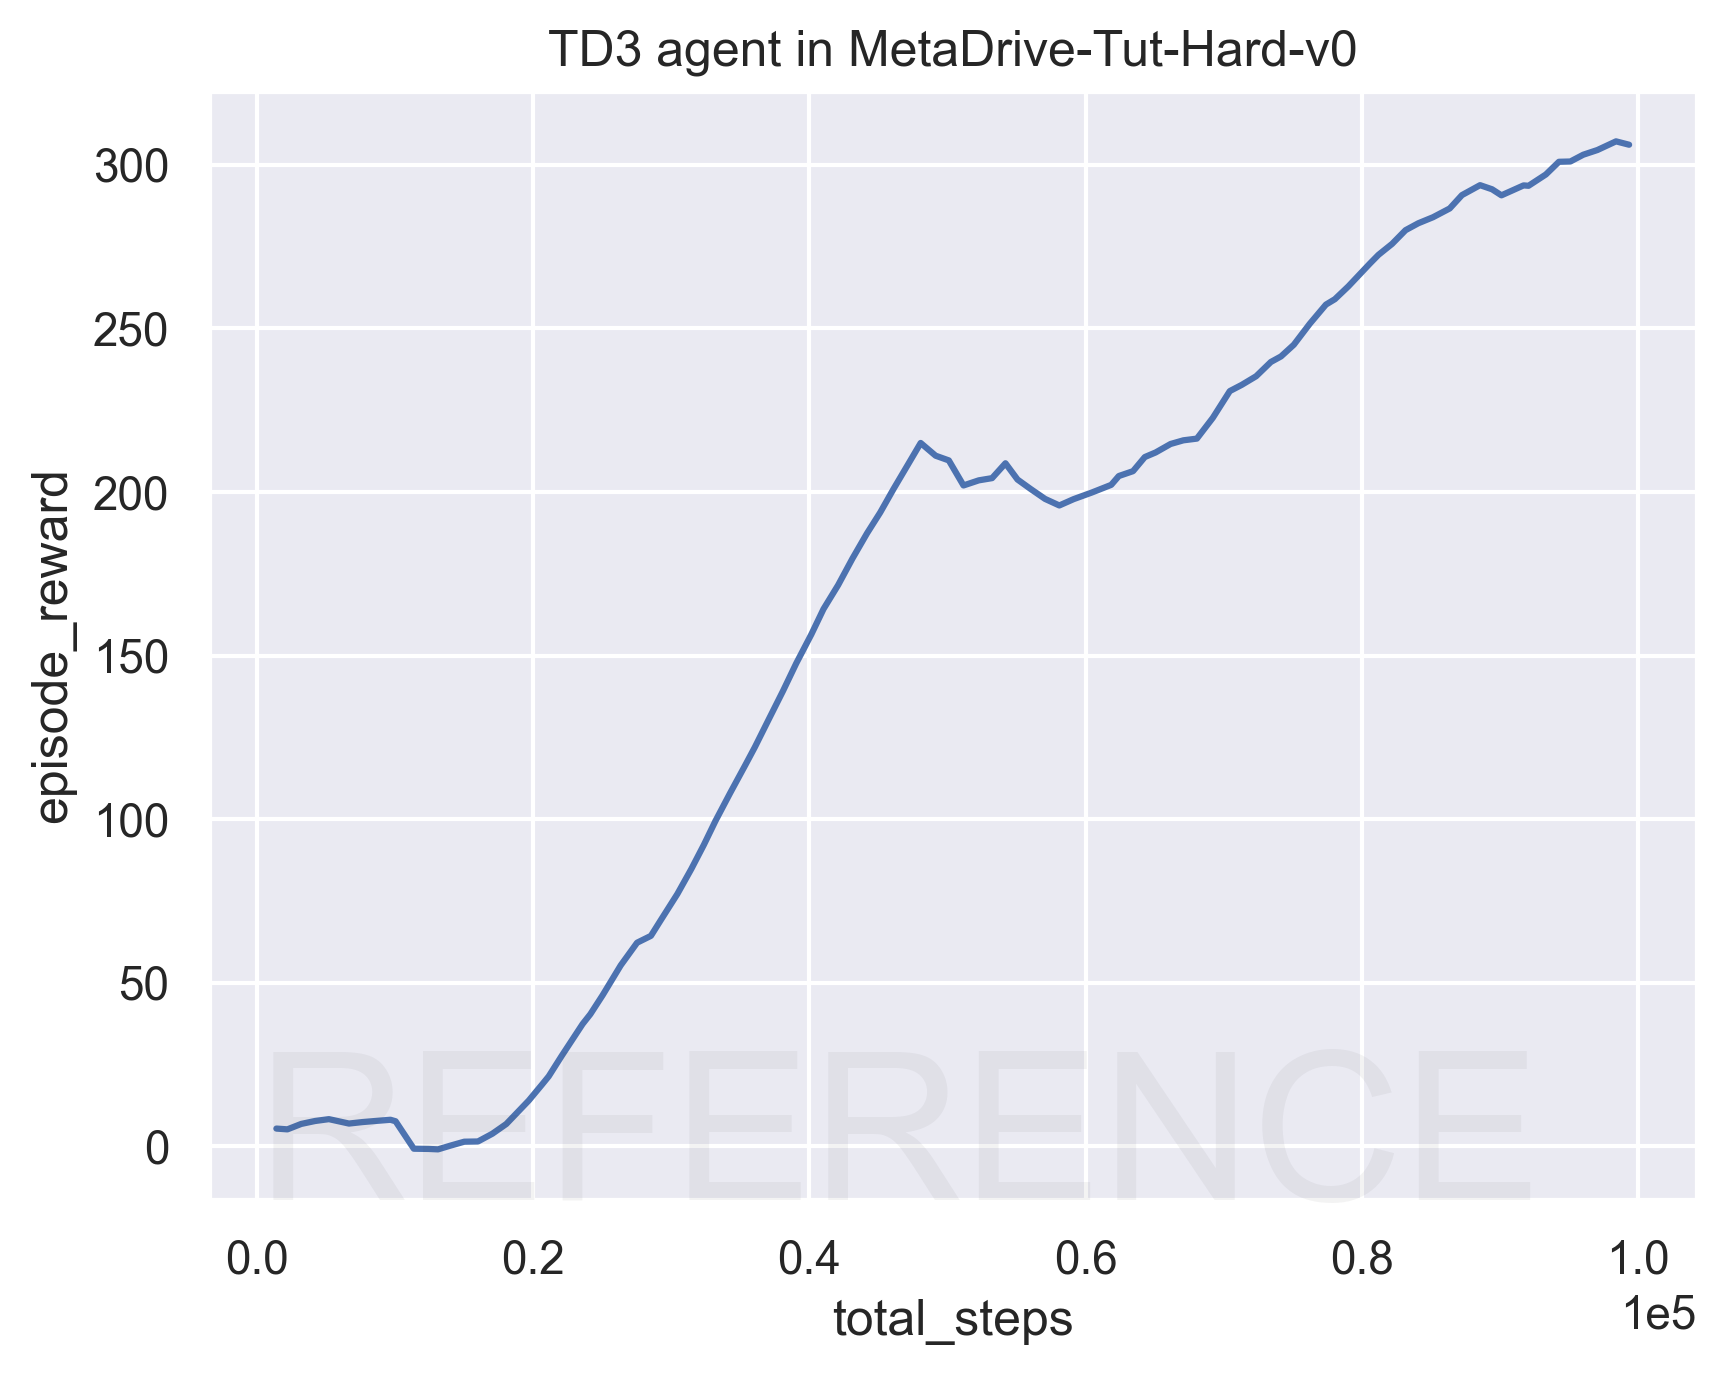

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line in your code.
ax.annotate("REFERENCE", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-td3.png', format='png', dpi=300, bbox_inches="tight")


## Demo 3: Train a PPO agent

You need to finish `core/ppo_trainer.py`, `core/buffer.py` and `train_ppo.py`.

Here we use GAE [1] (Generalized Advantage Estimation) to estimate the advantage. This technique is implemented in `PPORolloutStorage.compute_returns` in `core/buffer.py`. Concretely, we estimate the advantage of current state $t$ via:

$$\delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)$$

$$A^{GAE}_t = \sum_{l=0}^{\infty} (\gamma \lambda) ^ l \delta_{t+l}$$

wherein $V$ is the state value function, $\lambda$ is a hyper-parameter defined in `PPOConfig["gae_lambda"]`.

You can find that when $\lambda = 0$, the GAE estimates advantage in an one-step TD manner. When $\lambda = 1$, the GAE reduces to Monte Carlo Estimation of the state value. Therefore by varying the $\lambda$, we can adjust the trade-off between the accuracy of the estimation (bias) and the variance of advantage.

[1]: Schulman, John , et al. "High-Dimensional Continuous Control Using Generalized Advantage Estimation." (2015).

### Demo 3.1 Train and draw the learning curve of PPO in CartPole

In [92]:
!python train_ppo.py \
--env-id CartPole-v1 \
--log-dir CartPole-v1 \
--num-envs 10 \
--max-steps 300000

/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assign

 73%|████████████████████████▏        | 220000/300000 [00:26<00:09, 8358.21it/s]
 ===== ppo Training Iteration 11 =====:
  adv_mean: 1.4252731800079346
  entropy: 0.500083566055848
  episode_reward: 401.35
  frame_per_second: 8196
  grad_norm: 43.28858369558285
  iteration: 11
  log_dir: /Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/CartPole-v1/ppo
  policy_loss: -0.0031688983561112905
  ratio: 0.9995071493662321
  total_episodes: 2557
  total_loss: 39.49123034844032
  total_steps: 240000
  total_time: 29.28252911567688
  value_loss: 39.4943990120521

 80%|██████████████████████████▍      | 240000/300000 [00:29<00:07, 8312.22it/s]
 ===== ppo Training Iteration 12 =====:
  adv_mean: 1.2862963676452637
  entropy: 0.4994207453269225
  episode_reward: 442.08
  frame_per_second: 8225
  grad_norm: 42.054898400184435
  iteration: 12
  log_dir: /Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023f

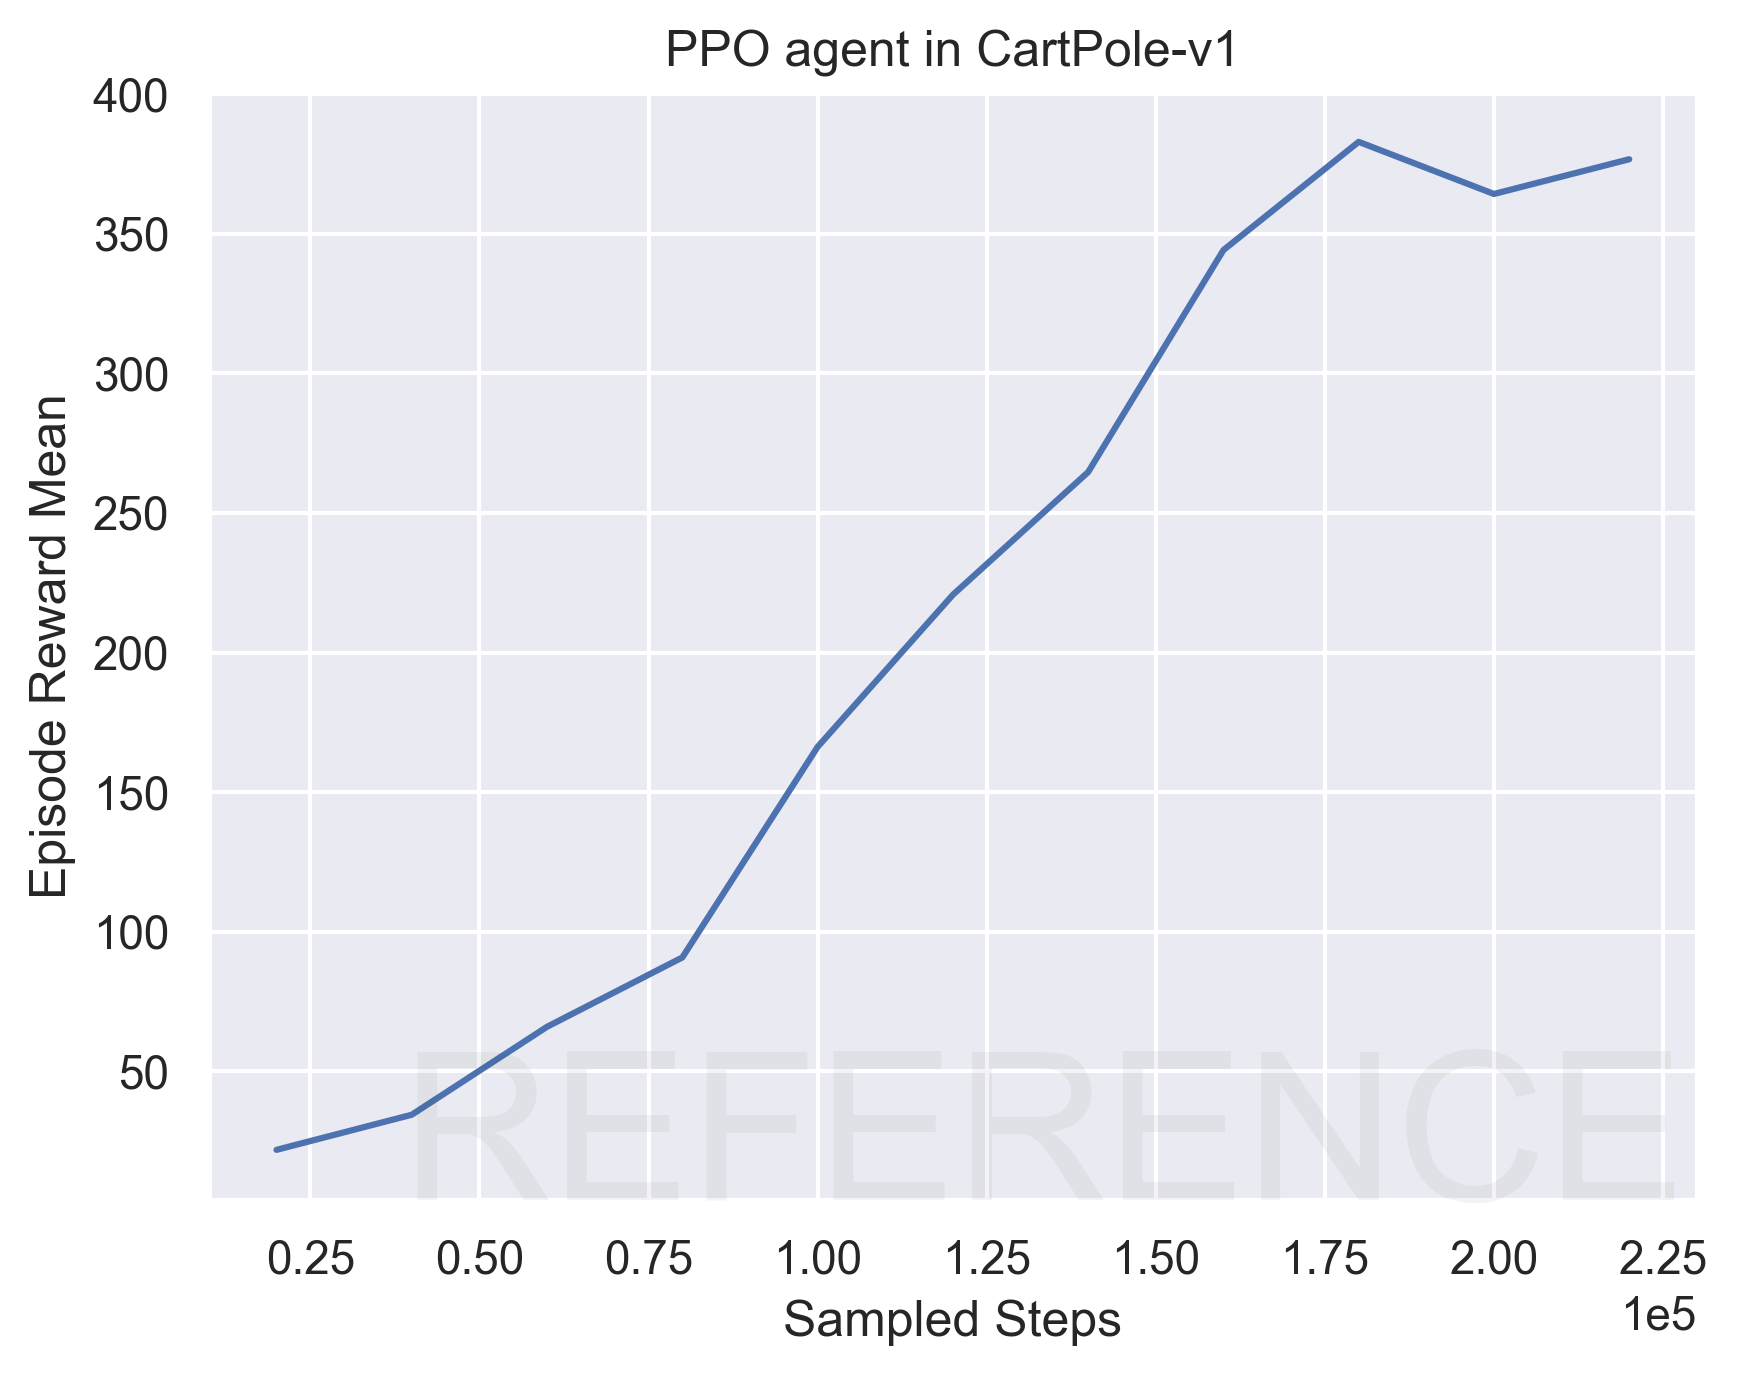

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("CartPole-v1/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in CartPole-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# You should remove this line in your code:
ax.annotate("REFERENCE", (ax.get_xlim()[1] / 6, ax.get_ylim()[0]), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('cartpole-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.2: Train and play with the PPO agent in MetaDrive Easy Env.

In [95]:
!python train_ppo.py \
  --env-id MetaDrive-Tut-Hard-v0 \
  --log-dir MetaDrive-Tut-Hard-v0 \
  --num-envs 10 \
  --max-steps 1_000_000

/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assign

[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: max step 
[INFO] Episode ended! Scenario Index: 1009 Reason: max step 
[INFO] Episode ended! Scenario Index: 1011 Reason: max step 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: max step 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: max step 
[INFO] Episode ended! Scenario Index: 1015 Reason: max step 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: max step 
[INFO] Episode ended! Scenario Index: 1015 Reason: max step 

 ===== ppo Training Iteration 0 =====:
  adv_mean: 0.15691877901554108
  entropy: 2.7964267602333654
  episode_reward: 6.453123

[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: max step 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: max step 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.

 ===== ppo Training Iteration 3 =====:
  adv_mean: 0.37138789892196655
  entropy: 2.576869448637351
  episode_reward: 14.040599262055876
  frame_per_second: 2164
  grad_norm: 1.3829320982098579
  iteration: 3
  log_dir: /Users/pengzhengh

[INFO] Episode ended! Scenario Index: 1006 Reason: max step 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.

 ===== ppo Training Iteration 5 =====:
  adv_mean: 0.8040376901626587
  entropy: 2.3447096613737255
  episode_reward: 23.067628570014058
  frame_per_second: 2095
  grad_n

 14%|████▍                           | 140000/1000000 [01:08<07:27, 1923.03it/s][INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 

[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario I

[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
 34%|██████████▉                     | 340000/1000000 [03:10<06:11, 1776.42it/s]
 ===== ppo Training Iteration 17 =====:
  adv_mean: 2.709604501724243
  entropy: 1.2971246687265543
  episode_reward: 129.1162084980948
  frame_per_second: 1881
  grad_norm: 151.2115541360317
  iteration: 17
  log_dir: /Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.0006636716580639283
  ratio: 1.0000570074105875
  success_rate: 0.0
  total_episodes: 1367
  total_loss: 35.89223727690868
  total_steps: 360000
  total_time: 191.35361409187317
  value_loss: 35.89290103667822

 36%|███████████▌                    | 360000/1000000 [03:11<06:00, 1777.20it/s][INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_

[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: crash vehicle 
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 

 ===== ppo Training Iteration 21 =====:
  adv_mean: 1.5063543319702148
  entropy: 1.0710597968254334
  episode_reward: 126.79478633949226
  frame_per_second: 1850
  grad_norm: 240.35334518628244
  iteration: 21
  log_dir: /Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: 1.171409385278821e-05
  ratio: 1.000702654169156
  success_rate: 0.0
  total_episodes: 1870
  total_loss: 44.77936579141861
  total_steps: 440000
  total_time: 237.77706

[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! 

[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario

 52%|████████████████▋               | 520000/1000000 [04:44<04:40, 1714.22it/s][INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Epi

[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario I

[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 

 ===== ppo Training Iteration 31 =====:
  adv_mean: 1.6128584146499634
  entropy: 0.7289700153546456
  episode_reward: 147.61067436160982
  frame_per_second: 1795
  grad_norm: 482.2438045599522
  iteration: 31
  log_dir: /Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.0007797562615731014
  ratio: 0.9998391143786601
  success_rate: 0.0
  total_episodes: 3161
  total_loss: 34.83690842114962
  total_steps: 640000
  total_time: 356.5370309352875
  value_loss: 34.837688047457966

 64%|████████████████████▍           | 640000/1000000 [05:56<03:34, 1677.34it/s][INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO]

[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Ind

[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! 

[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Ind

[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
 76%|████████████████████████▎       | 760000/1000000 [07:20<02:25, 1651.91it/s]
 ===== ppo Training Iteration 38 =====:
  adv_mean: 0.06916846334934235
  entropy: 0.5112774980373872
  episode_reward: 136.80758700366587
  frame_per_second: 1765
  grad_norm: 662.4713102487417
  iteration: 38
  log_dir: /Users/pengzhenghao/PycharmProjects/cs260r/cs260r

[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 

 ===== ppo Training Iteration 40 =====:
  adv_mean: -0.05817294493317604
  entropy: 0.42833585509887107
  episode_reward: 139.98499746704573
  frame_per_second: 1758
  grad_norm: 776.573710162823
  iteration: 40
  log_dir: /Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: 0.0021048595322869144
  ratio: 0.9999278520162289
  success_rate: 0.0
  total_episodes: 4466
  total_loss: 44.615439199789975
  total_steps: 820000
  total_time: 466.32089710235596
  value_loss: 44.61333471689469

Trainer is saved at </Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo/checkpoint-iter40.pkl>. Progress is saved at </Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-in

[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Ind

[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended

[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario I

[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
 94%|██████████████████████████████  | 940000/1000000 [09:10<00:36, 1631.57it/s]
 ===== ppo Training Iteration 47 =====:
  adv_mean: -0.29424744844436646
  entropy: 0.4053830294272838
  episode_reward: 140.54983284193318
  frame_per_second: 1738
  grad_norm: 747.7581447699131
  iteration: 47
  log_dir: /Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: 0.0027984449613051346
  ratio: 1.0003580887348225
  success_rate: 0.0
  total_episodes: 5466
  total_loss: 41.388673557379306
  total_steps: 960000
  total_time: 552.1890199184418
  value_loss: 41.38587507101206

 96%|██████████████████████████████▋ | 960000/1000000 [09:11<00:24, 1632.02it/s][INFO] Episode ended! Scenario Index: 1017 Reason: out_of

[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Ind

[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! 

[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenar

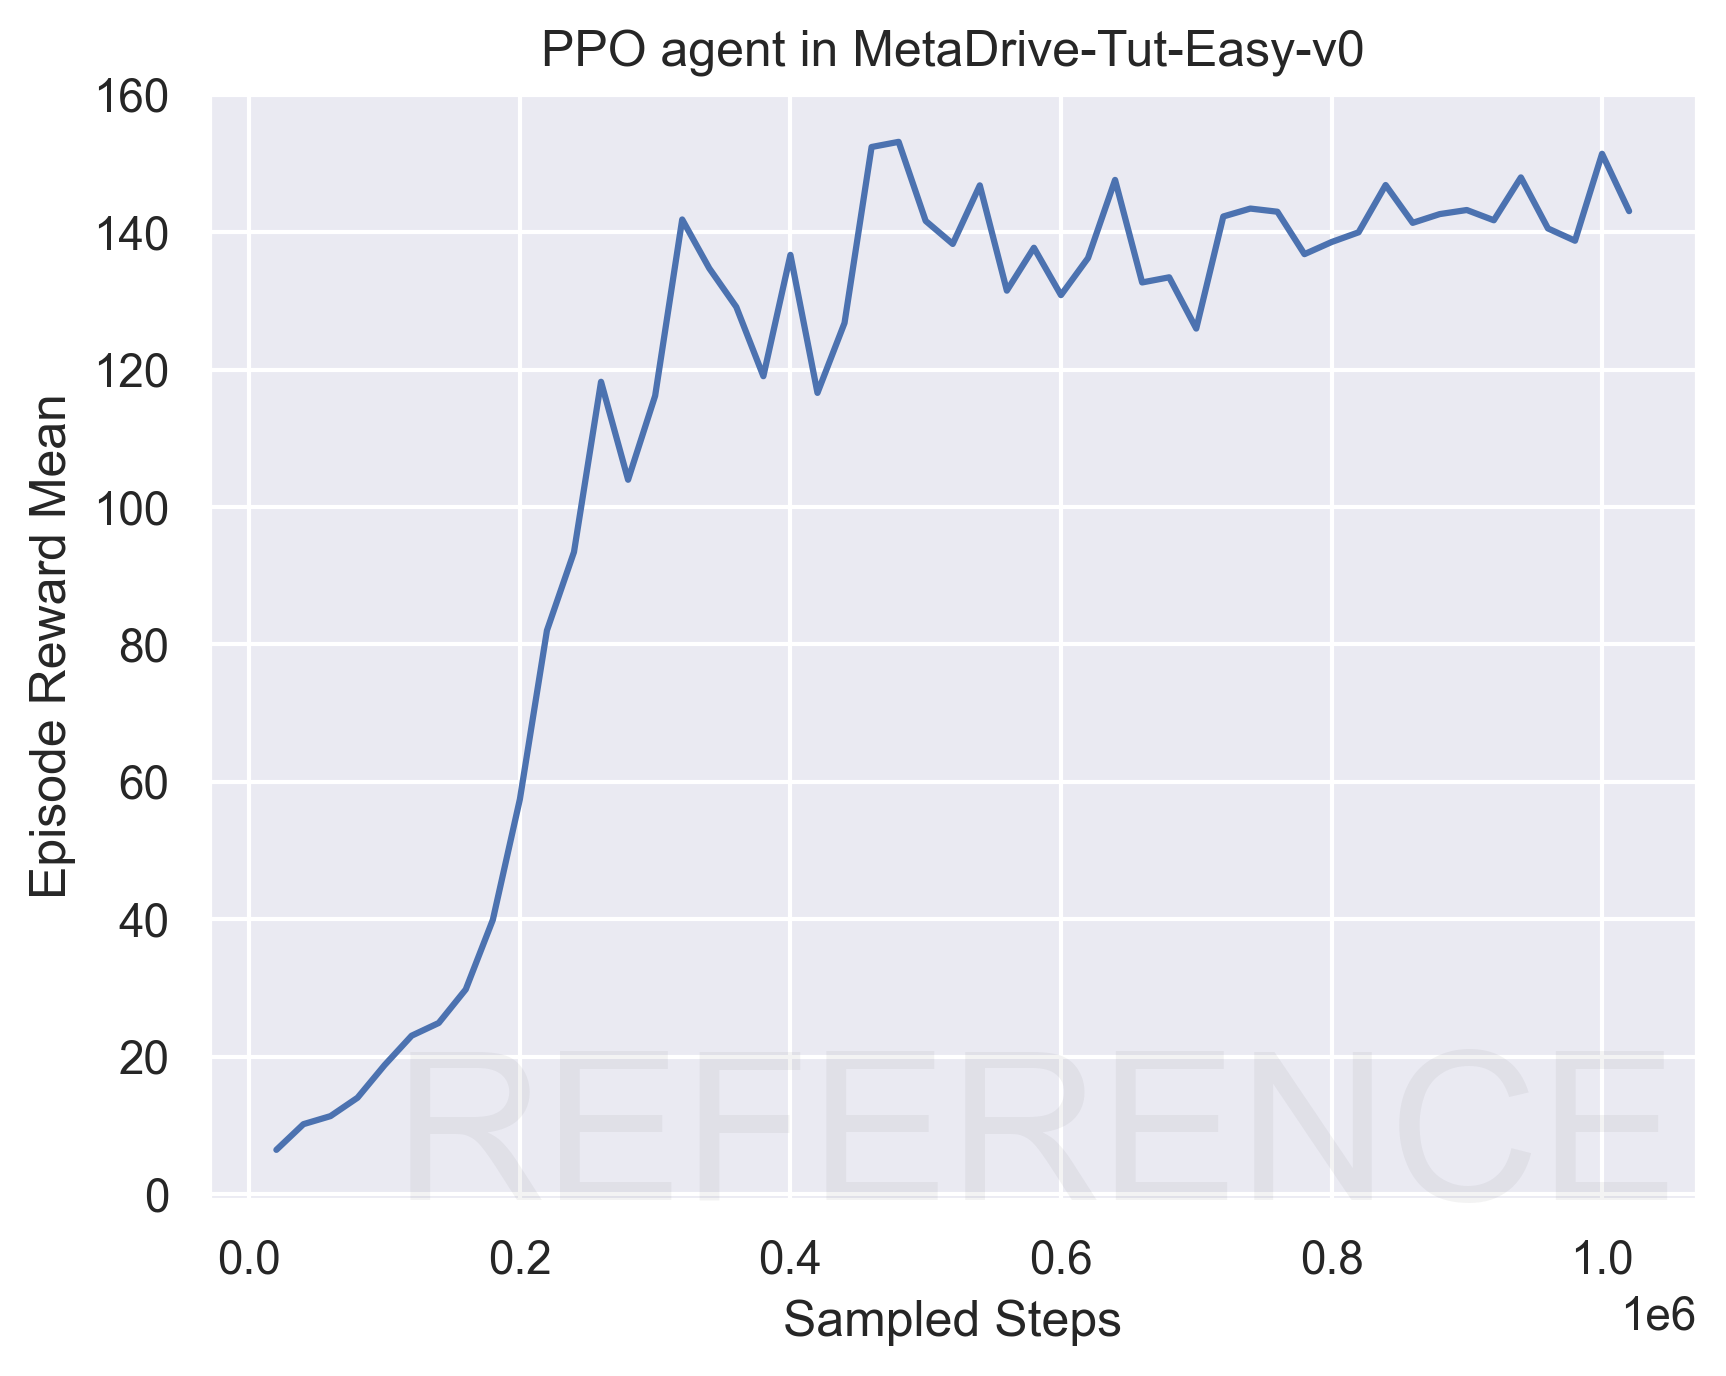

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in MetaDrive-Tut-Hard-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line
ax.annotate("REFERENCE", (ax.get_xlim()[1] / 10, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Visualize the performance of PPO in MetaDrive Hard Env.

You might have different maps in your visualization, that's expected. You don't need to submit the video to anywhere.

In [4]:
# Load the agent using PolicyAPI (easy to use interface to get policy)

from core.envs import make_envs
import gymnasium as gym
from vis import PPOPolicy, evaluate, animate
import pygame

env_name = "MetaDrive-Tut-Hard-v0"
policy = PPOPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Tut-Hard-v0/ppo/",
    suffix="final"
)


# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    env_name=env_name,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]

animate(frames)

print("PPO agent achieves {} return in MetaDrive Easy environment.".format(eval_reward))

environment_num is deprecated. Use num_scenarios instead!
environment_num is deprecated. Use num_scenarios instead!


Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully load weights from /Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo/checkpoint-final.pkl!
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.002
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 95.015


PPO agent achieves 116.0347676104869 return in MetaDrive Easy environment.


## Demo 4: GAIL agent

In [11]:
!python train_gail.py \
  --env-id MetaDrive-Tut-Easy-v0 \
  --log-dir MetaDrive-Tut-Easy-v0 \
  --num-envs 10 \
  --max-steps 1000000 \
  --expert-dataset-size 30000

/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/core
/home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fal

Generated 1000/30000 steps from the expert. Average episode reward: 112.570, success rate: 0.950
Generated 2000/30000 steps from the expert. Average episode reward: 112.811, success rate: 0.962
Generated 3000/30000 steps from the expert. Average episode reward: 112.660, success rate: 0.954
Generated 30000 steps from the expert. Average episode reward: 112.660, success rate: 0.954
Start training!
===== gail Training Iteration 0 =====:
  adv_mean: 0.0
  discriminator_loss: 0.4790880781192428
  entropy: 2.765247808664273
  episode_reward: 2.4261104633809234
  frame_per_second: 1592
  gail_reward: 0.027426237079243247
  grad_norm: 1.4316197511477349
  iteration: 0
  log_dir: /home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/MetaDrive-Tut-Easy-v0/gail
  policy_loss: -0.031809635761265574
  ratio: 1.0017187595367432
  success_rate: 0.0
  total_episodes: 92
  total_loss: -0.03180963567290933
  total_steps: 20000
  total_time: 12.557895183563232

Trainer is saved at </home/zhe

===== gail Training Iteration 13 =====:
  adv_mean: 0.0
  discriminator_loss: 0.19595882970935258
  entropy: 1.1248853119520041
  episode_reward: 7.676452130433116
  frame_per_second: 1388
  gail_reward: 0.0724622287381536
  grad_norm: 1.5785549662052056
  iteration: 13
  log_dir: /home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/MetaDrive-Tut-Easy-v0/gail
  policy_loss: -0.07326427114028962
  ratio: 1.0025797613156147
  success_rate: 0.02
  total_episodes: 3759
  total_loss: -0.07326427135043419
  total_steps: 280000
  total_time: 201.65575051307678

===== gail Training Iteration 14 =====:
  adv_mean: 0.0
  discriminator_loss: 0.24568411042101873
  entropy: 0.9952759670905578
  episode_reward: 13.817004787445223
  frame_per_second: 1381
  gail_reward: 0.0604698611709934
  grad_norm: 2.9951892825273365
  iteration: 14
  log_dir: /home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/MetaDrive-Tut-Easy-v0/gail
  policy_loss: -0.06071585297393493
  ratio: 1.0

===== gail Training Iteration 27 =====:
  adv_mean: 0.0
  discriminator_loss: 0.19385843986693102
  entropy: 0.05587788589316635
  episode_reward: 84.43653706723217
  frame_per_second: 1373
  gail_reward: 0.04507684771162577
  grad_norm: 9.075339367450812
  iteration: 27
  log_dir: /home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/MetaDrive-Tut-Easy-v0/gail
  policy_loss: -0.04548224314856224
  ratio: 1.0006618252931496
  success_rate: 0.27
  total_episodes: 7397
  total_loss: -0.045482243368258846
  total_steps: 560000
  total_time: 407.7357499599457

===== gail Training Iteration 28 =====:
  adv_mean: 0.0
  discriminator_loss: 0.19198116545493787
  entropy: 0.04029166120886564
  episode_reward: 88.04055147603833
  frame_per_second: 1373
  gail_reward: 0.06202299406226629
  grad_norm: 5.058152504456349
  iteration: 28
  log_dir: /home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/MetaDrive-Tut-Easy-v0/gail
  policy_loss: -0.06215852314176468
  ratio: 1.

===== gail Training Iteration 41 =====:
  adv_mean: 0.0
  discriminator_loss: 0.29213373128038184
  entropy: 0.024338371103975732
  episode_reward: 111.8366344907218
  frame_per_second: 1376
  gail_reward: 0.060472841307711904
  grad_norm: 3.8530718540533995
  iteration: 41
  log_dir: /home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/MetaDrive-Tut-Easy-v0/gail
  policy_loss: -0.0606514491331883
  ratio: 0.9997712726776417
  success_rate: 0.94
  total_episodes: 9979
  total_loss: -0.0606514491713964
  total_steps: 840000
  total_time: 610.3583798408508

===== gail Training Iteration 42 =====:
  adv_mean: 0.0
  discriminator_loss: 0.3033753021596334
  entropy: 0.013534459330213185
  episode_reward: 110.85057790428556
  frame_per_second: 1376
  gail_reward: 0.09192159287631511
  grad_norm: 3.7352602616334574
  iteration: 42
  log_dir: /home/zhenghao/CS269/cs269-2022fall-workshop/assignment3(2022fall)/MetaDrive-Tut-Easy-v0/gail
  policy_loss: -0.0914330980143486
  ratio: 1

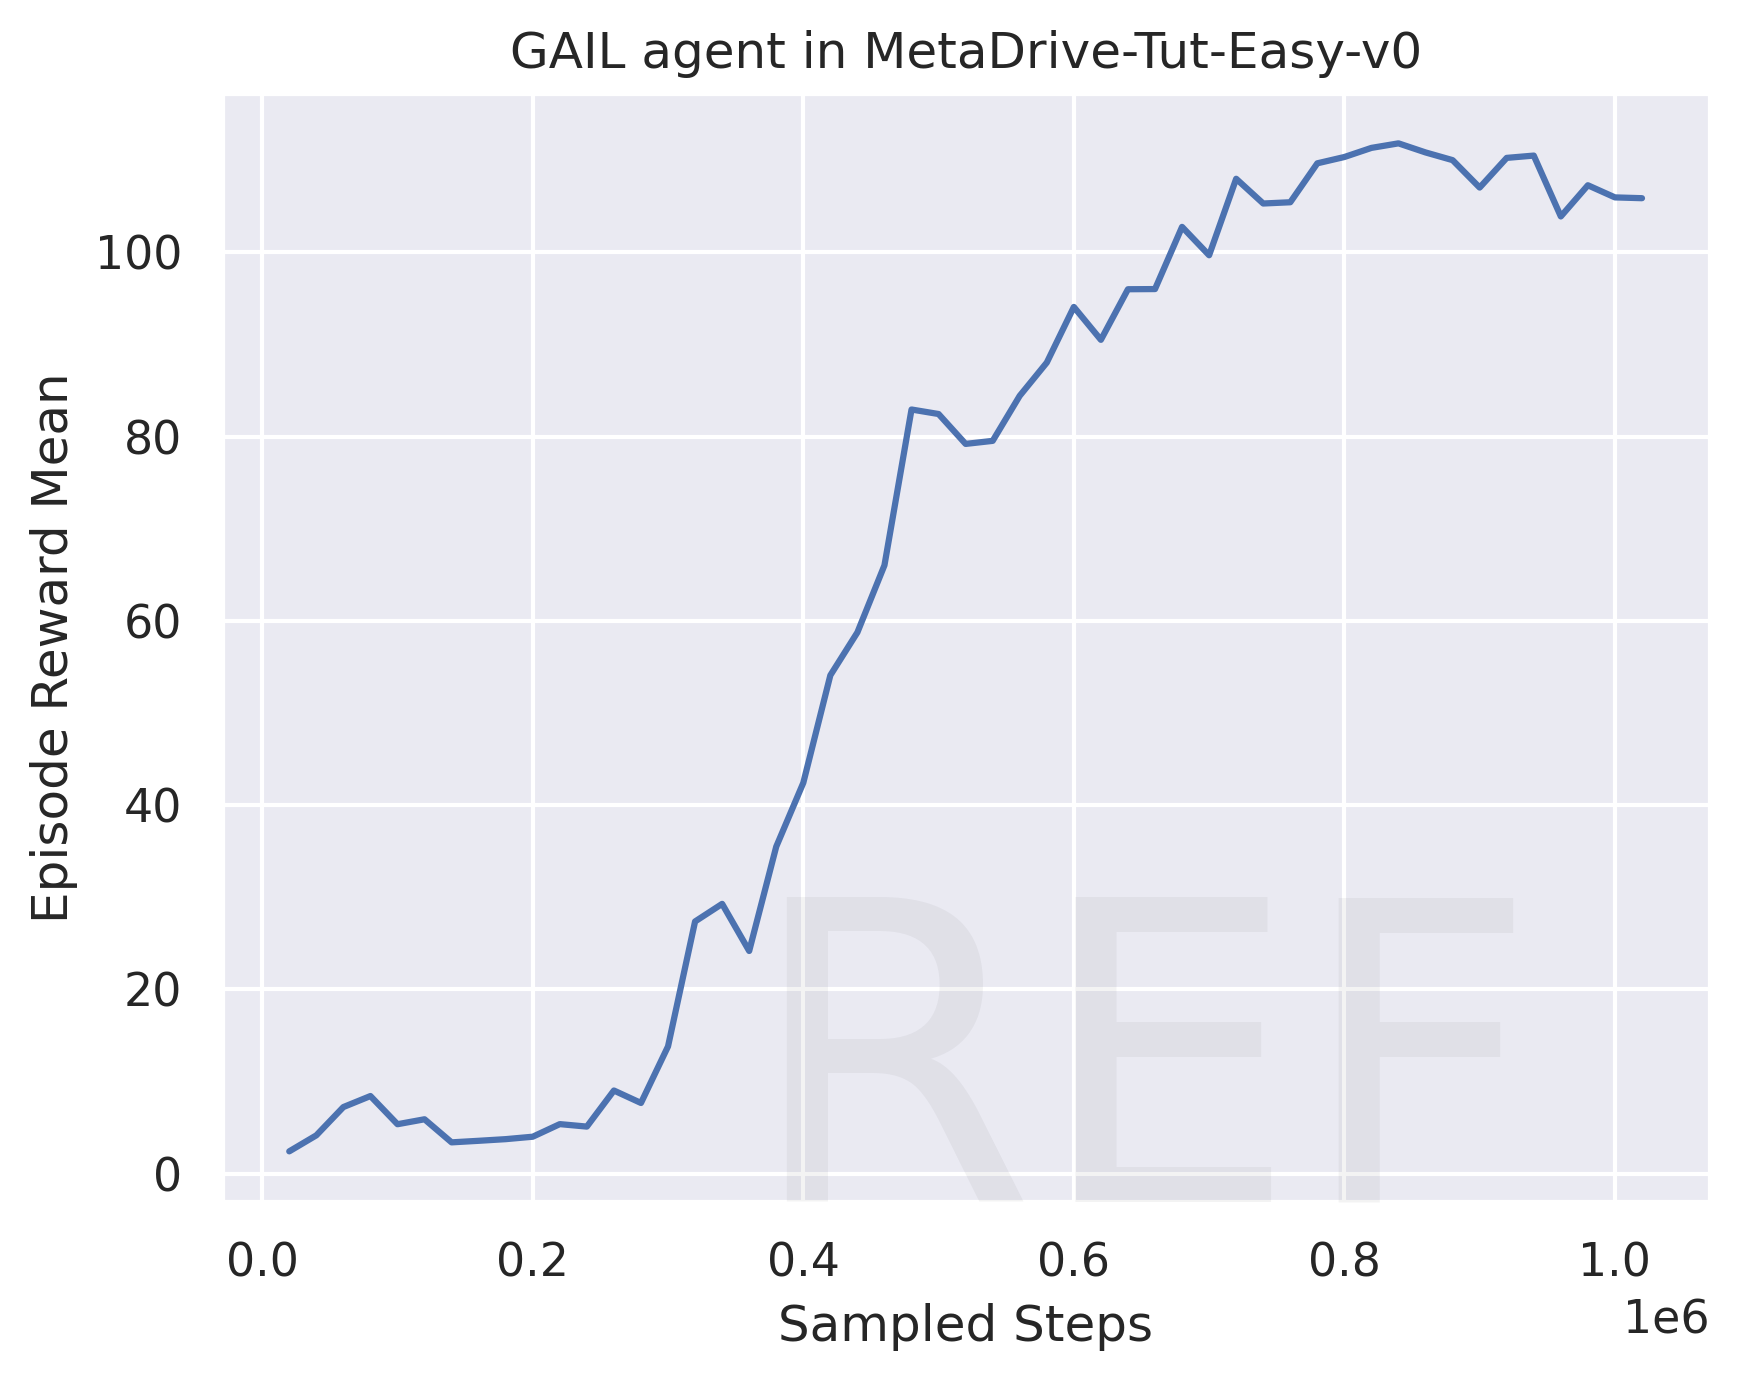

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Easy-v0/gail/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("GAIL agent in MetaDrive-Tut-Easy-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.savefig('metadrive-easy-gail.png', format='png', dpi=300, bbox_inches="tight")


## Demo 5: Generalization Experiments

Here we draw the figures of generalization experiments. You can always find that when training in the environment with only one sceanrio, the test performance is poor.

Due to computing resource limit, we do not require you to repeat the experiments for multiple time. This leads to huge instability in the performance. As you can see, in TD3 generalization experiments, when training with 20 traffic sceanrios, the training and test performance both drop. Repeating multiple times of experiments with different random seeds can relieve this issue.

We provide `train_[ppo|gail|td3].py`, `eval_[ppo|gail|td3].py`, `[ppo|gail|td3]_generalization_train.sh` and `[ppo|gail|td3]_generalization_eval.sh`. You can refer to them for more information.

You only need to pick one algorithm and run the generalization experiments. See `result.md` for more details.


References:

The Figure 8 in [MetaDrive paper](https://arxiv.org/pdf/2109.12674.pdf).

The Figure 2 in [ProcGen paper](http://proceedings.mlr.press/v97/cobbe19a/cobbe19a.pdf).



Text(34.983333333333334, 167.25650970900836, 'REF')

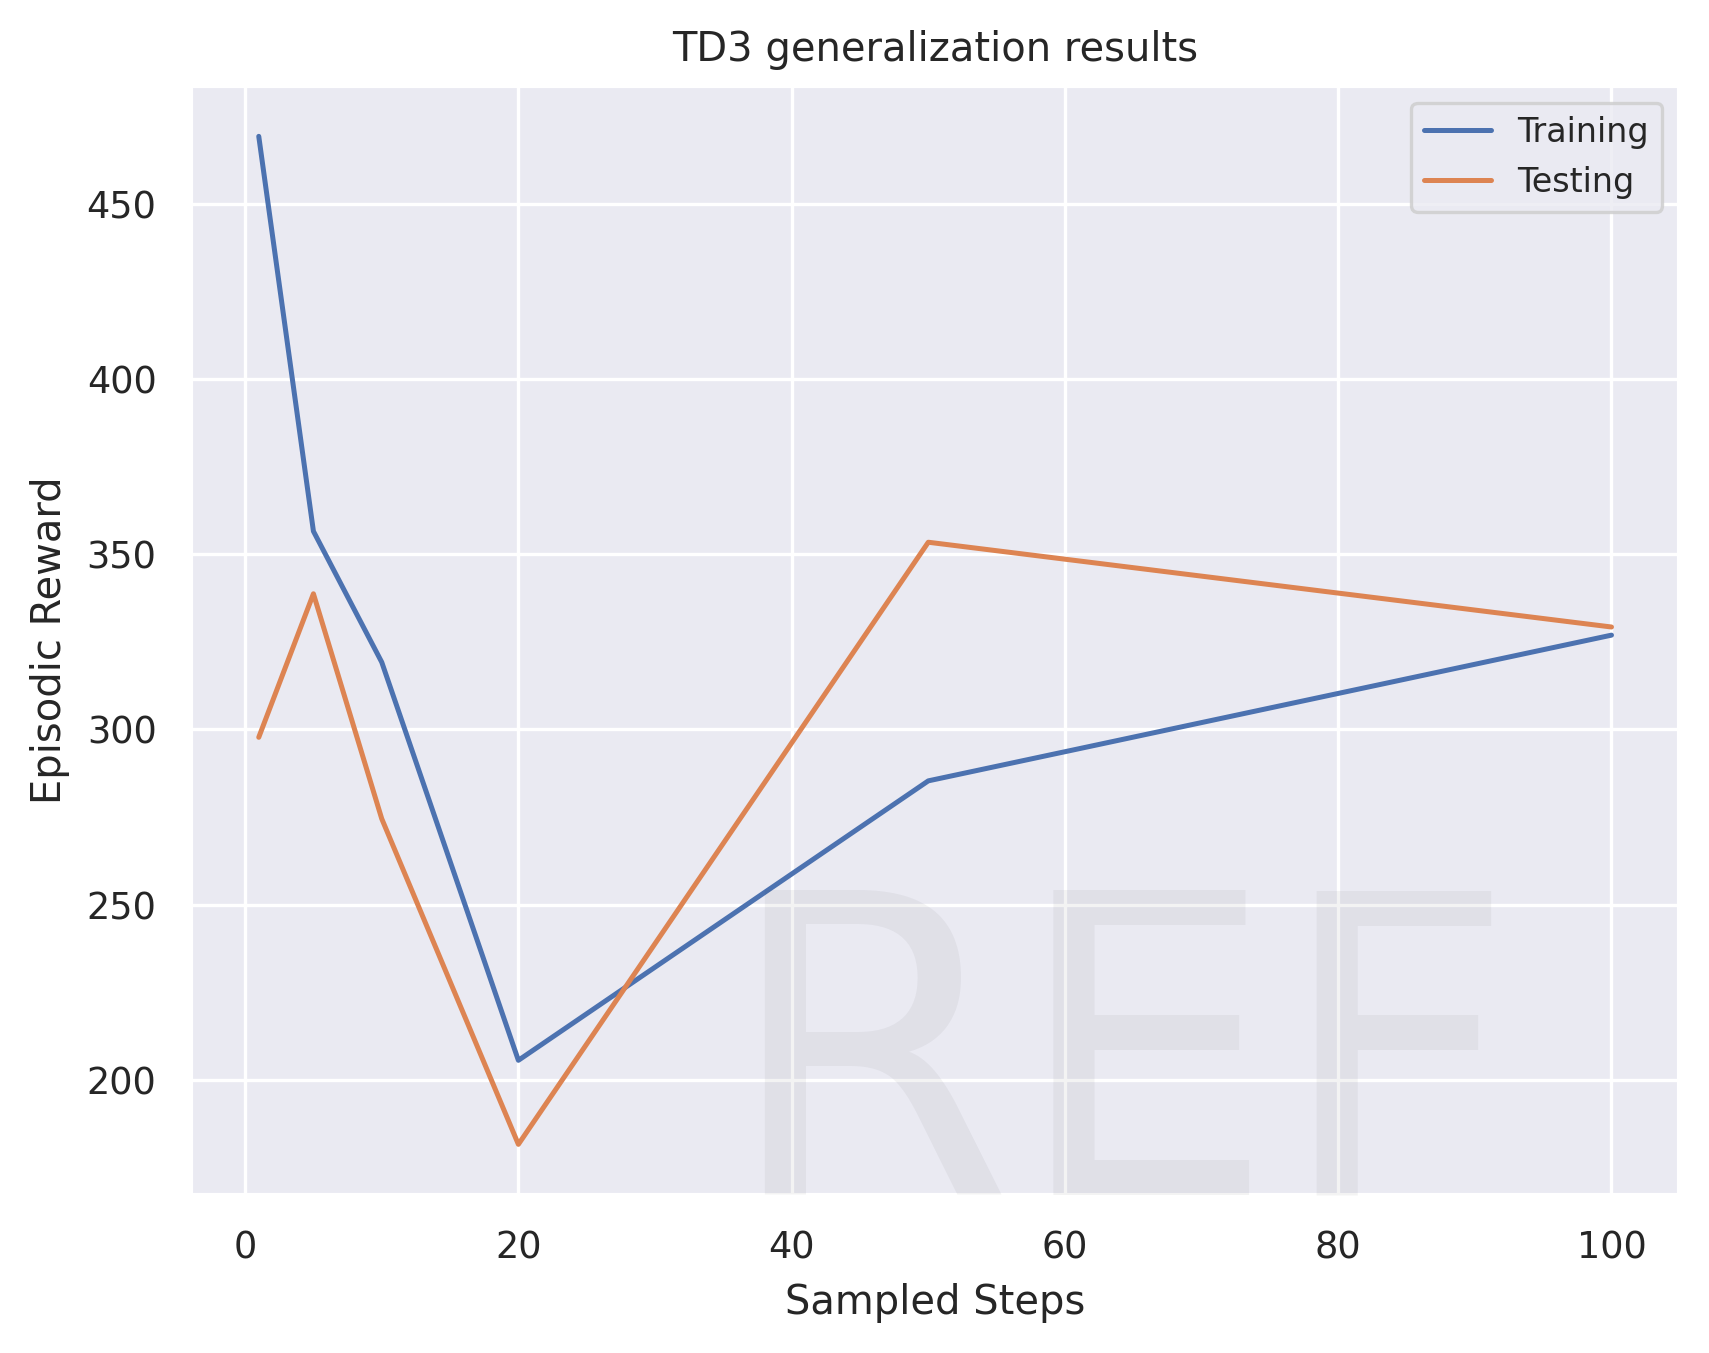

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []b

Text(34.983333333333334, 91.93084606603081, 'REF')

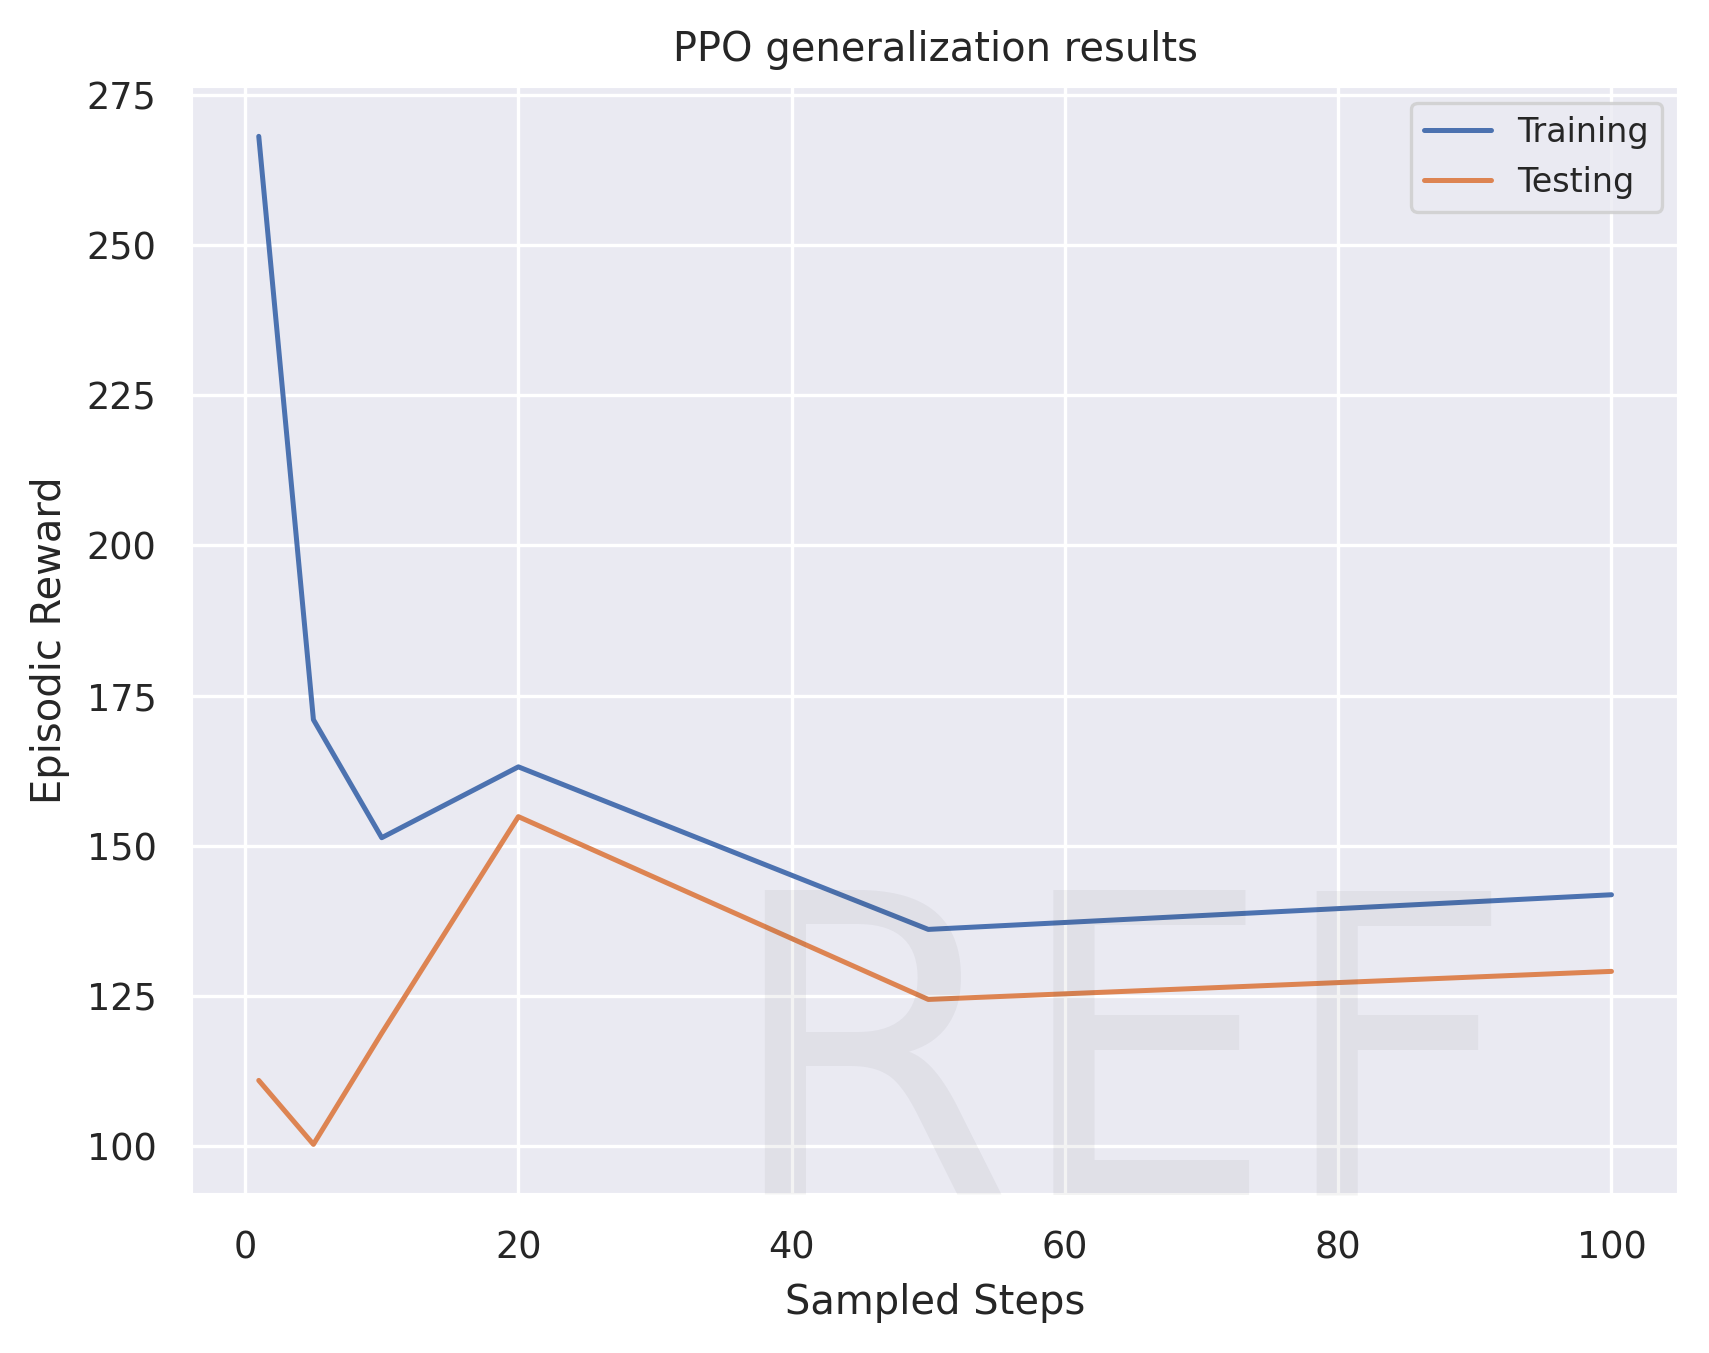

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("PPO generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
ax.set_yscale('log')
# ax.set_xlim(0, 1.1e6)
# ax.set_ylim(0, 8)
ax.legend(fontsize=8, loc="upper right")
ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)



# # Note: The following figure is for reference used only, you don't have to repreduce it.

Text(34.983333333333334, 37.12063339621031, 'REF')

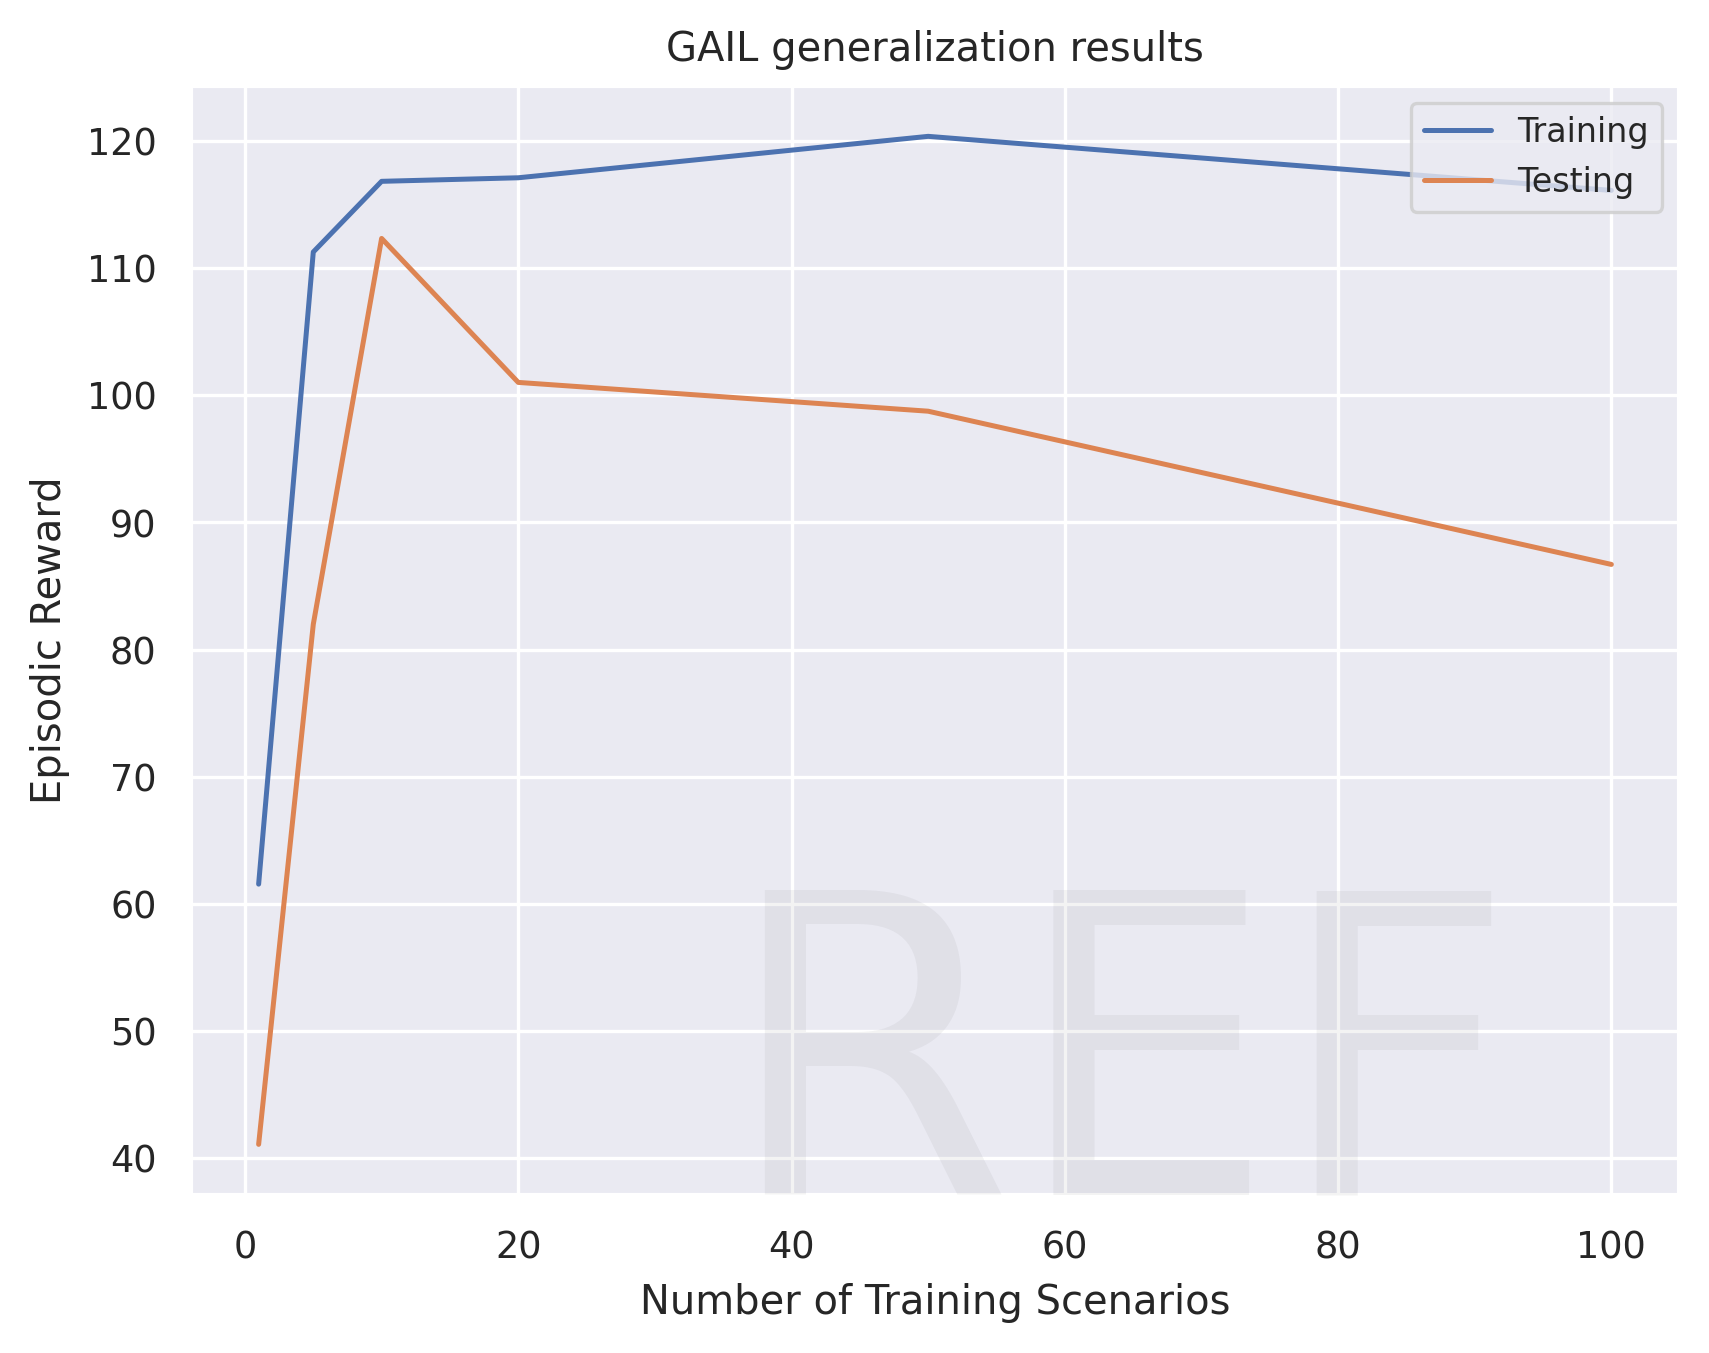

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/gail/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/gail/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("GAIL generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Number of Training Scenarios")
# ax.set_xlim(0, 1.1e6)
# ax.set_ylim(0, 8)
ax.legend(fontsize=8, loc="upper right")
ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)



# # Note: The following figure is for reference used only, you don't have to repreduce it.

You can run script in this notebook.

In [4]:
# Debug
!python eval_ppo.py --log-dir MetaDrive-Tut-Easy-v0/ppo --num-envs 2

/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
/Users/pengzhenghao/opt/anaconda3/envs/cs260r/lib/python3.11/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/Users/pengzhenghao/opt/anaconda3/envs/cs260r/lib/python3.11/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  logger.warn(f"

[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
Finished 40/50 episodes. Average episode reward: 269.228
[INFO] Episode ended! Scenario Index: 0 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 0 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 0 Reason: out_of_road.
Finished 50/50 episodes. Average episode reward: 266.570
The average return after running PPO agent for 50 episodes in MetaDrive-Tut-Test-v0 environment: 266.5704181579371.
Result is saved at: MetaDrive-Tut-

In [5]:
# Debug
!python eval_gail.py --log-dir MetaDrive-Tut-Easy-v0/gail --num-envs 2 --num-episodes 5

/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
/Users/pengzhenghao/PycharmProjects/cs260r/cs260r-assignment-2023fall-internal/2023fall/assignment3-WITHSOLUTION/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
/Users/pengzhenghao/opt/anaconda3/envs/cs260r/lib/python3.11/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id}

In [ ]:
# Debug
!python eval_td3.py --log-dir MetaDrive-Tut-Easy-v0/td3 --num-envs 2 --num-episodes 5